#Perkenalan

**Anggota Kelompok**:
1. Abdillah Halim Hanafi
2. Achmad Arga Bimantara Akbar
3. Dea Rishanti


**LATAR BELAKANG**
- Kasus yang dipilih berdasarkan dataset "weatherAUS.csv" tentang analisis cuaca di Australia dan menyediakan informasi seputar parameter cuaca harian di berbagai lokasi di Australia
- Jumlah Dataset: 1.45 juta baris dan 23 kolom. Setiap baris mewakili catatan harian cuaca di suatu lokasi di Australia.
- Kelas: Kelas yang akan diprediksi pada dataset ini adalah "RainTomorrow" (hujan besok). Kelas ini memiliki dua kemungkinan nilai: "Yes" (Ya) jika diperkirakan akan hujan besok, dan "No" (Tidak) jika diperkirakan tidak akan hujan besok.
- Sumber Data: "weatherAUS.csv" (https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package)
- Tujuan yang dicapai: membangun model prediksi cuaca yang dapat memperkirakan apakah akan terjadi hujan besok berdasarkan data cuaca historis di Australia. Dengan menggunakan data cuaca historis, termasuk parameter cuaca seperti suhu, kelembaban, kecepatan angin, tekanan udara, dll untuk membantu dalam mengambil keputusan berdasarkan prediksi cuaca di masa depan.

#Import Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,  confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

#Load Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/kaggle_dataset/rain-australia/weatherAUS.csv",)

1. Date - tanggal hari itu
2. Location - lokasi, nama kota di Australia
3. MinTemp - temperatur terendah hari itu dalam celcius
4. MaxTemp - temperatur tertinggi hari itu dalam celcius
5. Rainfall - jumlah curah hujan hari itu dalam mm
6. Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam
sebelum jam 9 pagi hari itu
7. Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
8. WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum
jam 12 malam hari itu
9. WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24
jam sebelum jam 12 malam hari itu
10. WindDir9am - arah angin jam 9 pagi
11. WindDir3pm - arah angin jam 3 sore
12. WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. Humidity9am - humiditas jam 9 pagi dalam persen
15. Humidity3pm - humiditas jam 3 sore dalam persen
16. Pressure9am - tekanan udara jam 9 pagi dalam hpa
17. Pressure3pm - tekanan udara jam 3 sore dalam hpa
18. Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam
oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0,
langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. Cloud3pm - persentase langit yang tertutup awan jam 3 sore
20. Temp9am - temperatur jam 9 pagi dalam celcius
21. Temp3pm - temperatur jam 3 sore dalam celcius
22. RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi
melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. RainTomorrow - variable yang mau di prediksi

#EDA

In [ ]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [ ]:
df.tail(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145450,2017-06-16,Uluru,5.2,24.3,0.0,NaN,NaN,E,24.0,SE,...,53.0,24.0,1023.8,1020.0,NaN,NaN,12.3,23.3,No,No
145451,2017-06-17,Uluru,6.4,23.4,0.0,NaN,NaN,ESE,31.0,S,...,53.0,25.0,1025.8,1023.0,NaN,NaN,11.2,23.1,No,No
145452,2017-06-18,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,...,56.0,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,No
145453,2017-06-19,Uluru,7.4,20.6,0.0,NaN,NaN,E,35.0,ESE,...,63.0,33.0,1027.2,1023.3,NaN,NaN,11.0,20.3,No,No
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [ ]:
df.shape

(145460, 23)

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

##Visualization

### Histogram

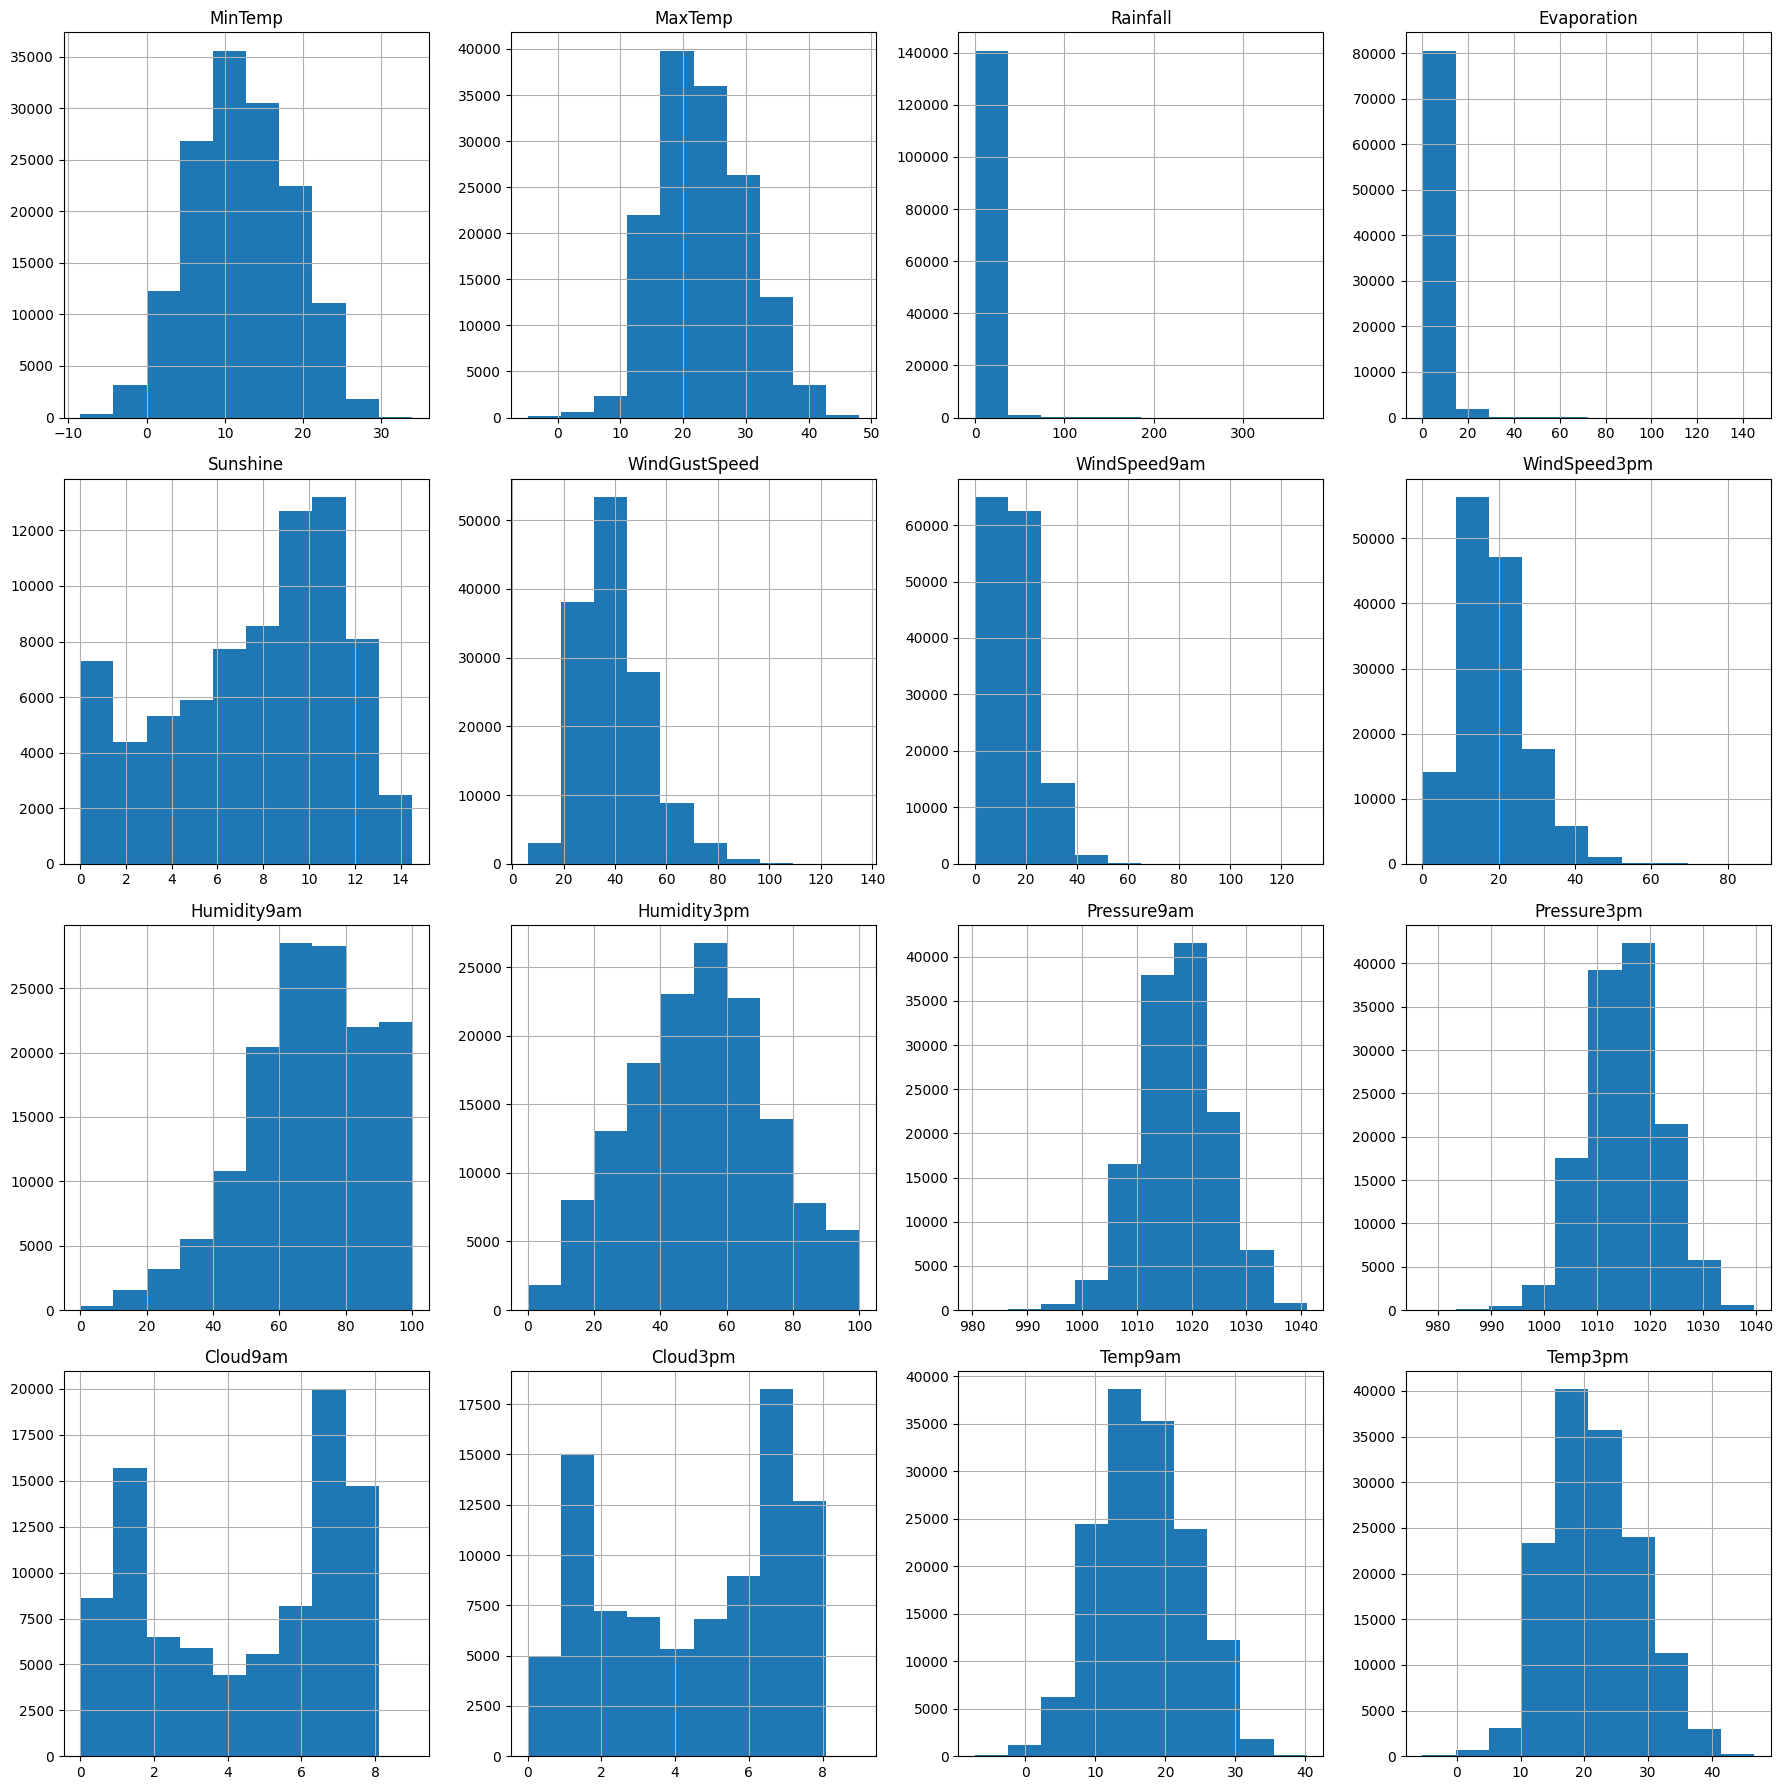

In [ ]:
df.hist(figsize=(18, 18))
plt.tight_layout()
plt.show()

Dari histogram berikut menunjukkan frequensi dari beberapa data, dan dari histogram berikut dapat teridentifikasi tipe distribusi tiap variabel, contoh nya seperti variabel temp9am, temp3pm yang terdistribusi secara normal dan variabel Humidity9am dan WinGustSpeed yang merupakan Skewed variabel

### Pairplot (scatter matrix)

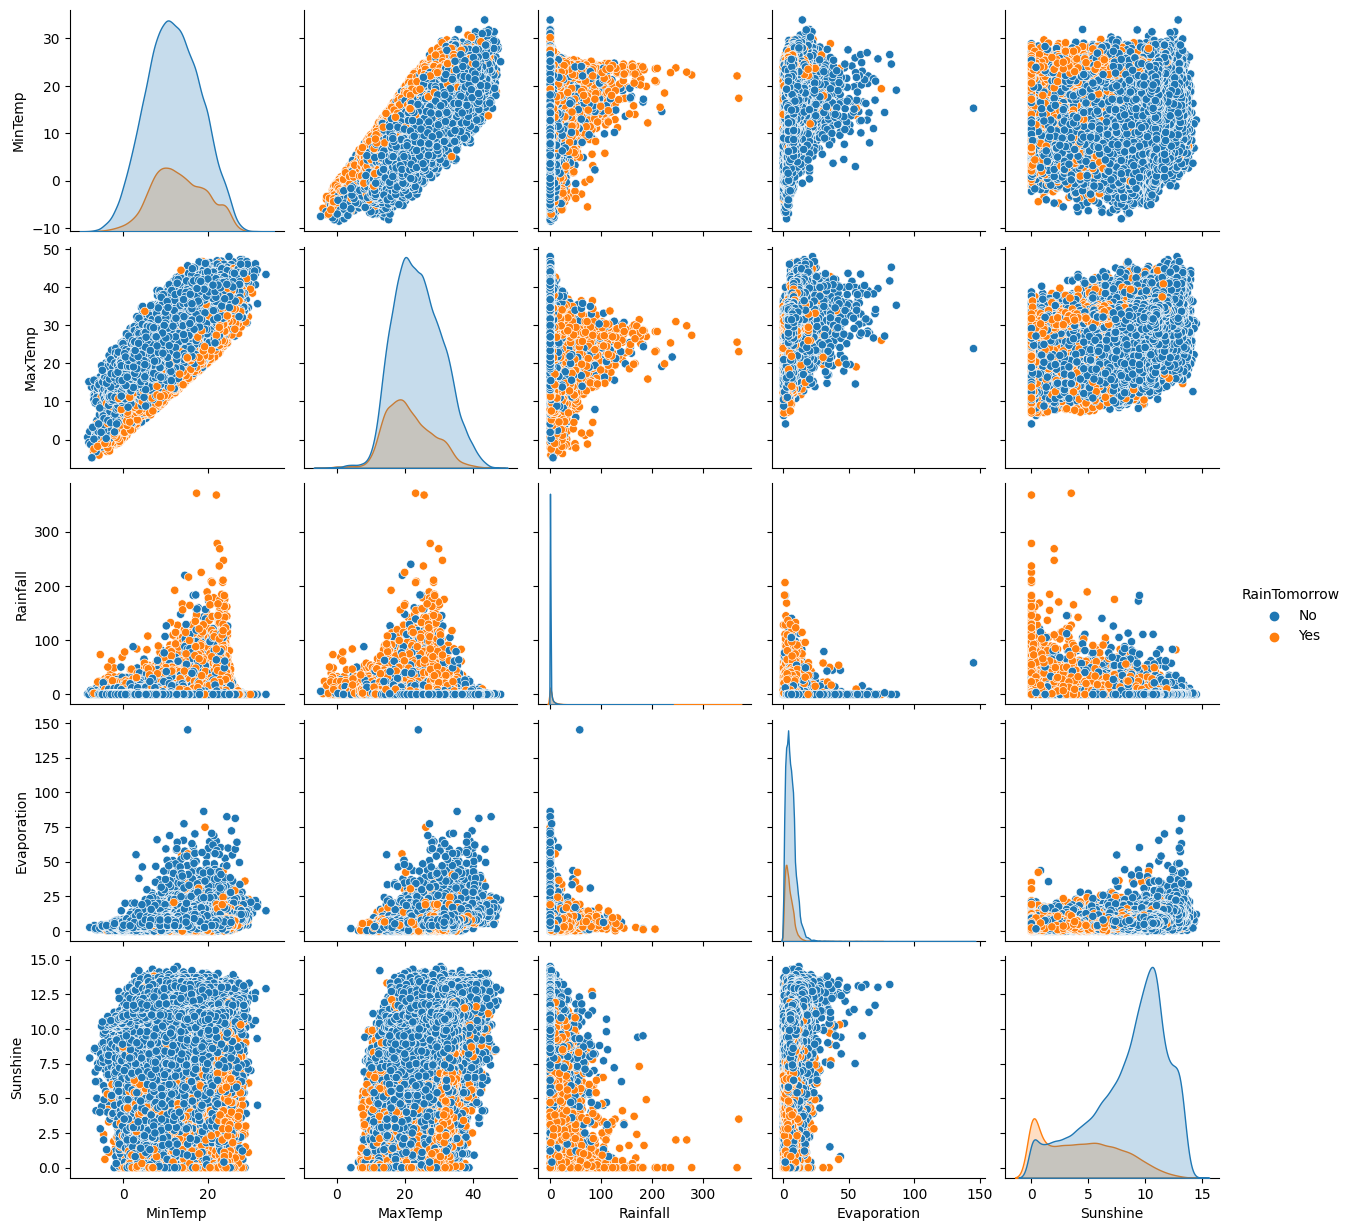

In [ ]:
sns.pairplot(data=df, vars=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine'], hue='RainTomorrow')
plt.show()


Visualiasi berikut adalah hubungan variabel 'RainTomorrow' dengan variabel 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine'

###Countplot

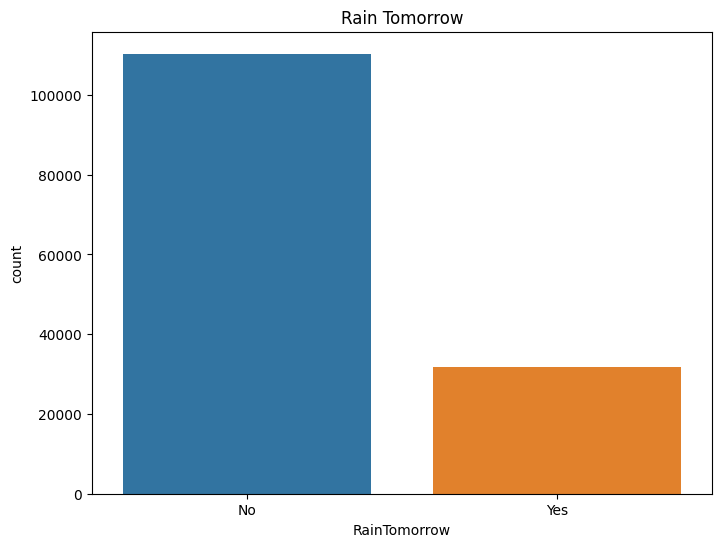

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='RainTomorrow')
plt.title('Rain Tomorrow')
plt.show()

Jumlah frekuensi tidak terjadi nya hujan pada 'RainTomorrow' lebih besar dari jumlah terjadinya hujan

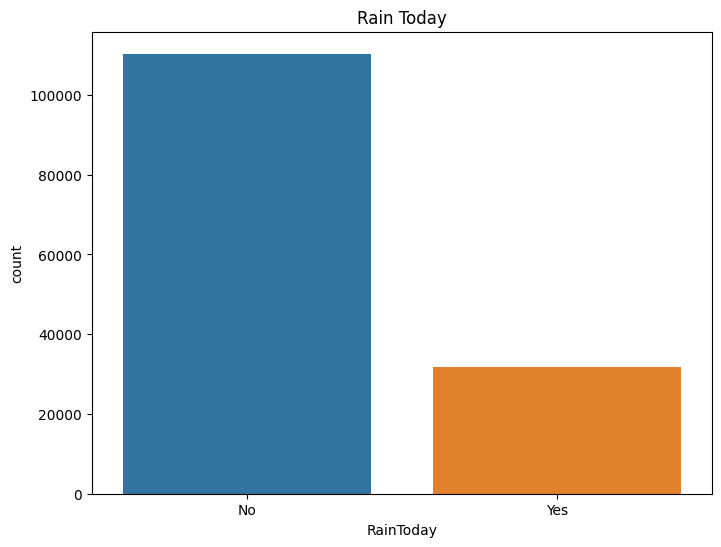

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='RainToday')
plt.title('Rain Today')
plt.show()

Jumlah frekuensi tidak terjadi nya hujan pada 'RainToday' lebih besar dari jumlah terjadinya hujan

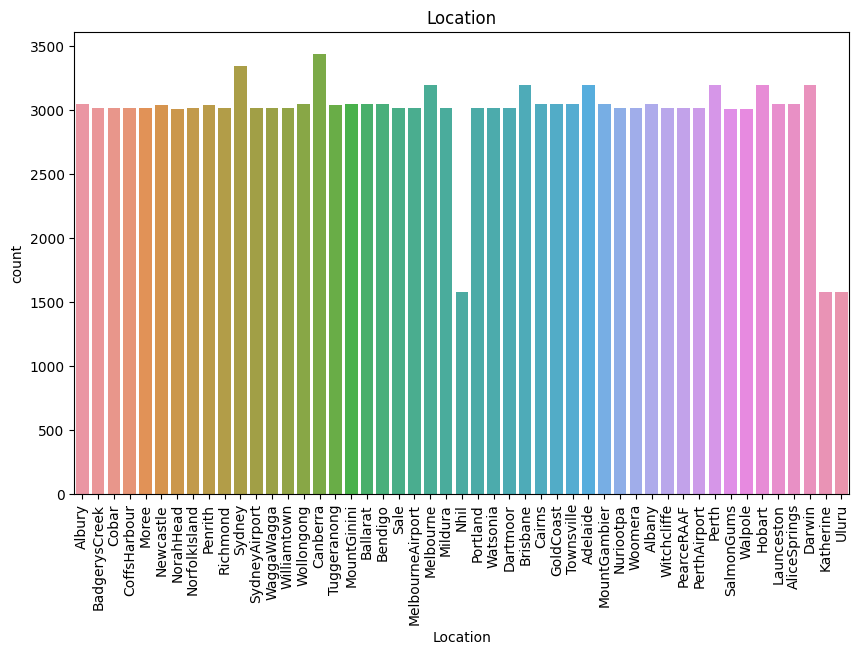

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Location')
plt.title('Location')
plt.xticks(rotation=90)
plt.show()

Data ini memberikan gambaran tentang frekuensi terjadinya hujan pada setiap lokasi yang terdaftar. Lokasi-lokasi seperti Canberra, Sydney, Darwin, dan Melbourne memiliki frekuensi tertinggi dengan lebih dari 3000 kejadian hujan. Sedangkan, lokasi seperti Katherine, Nhil, dan Uluru memiliki frekuensi yang lebih rendah dengan 1578 kejadian hujan.

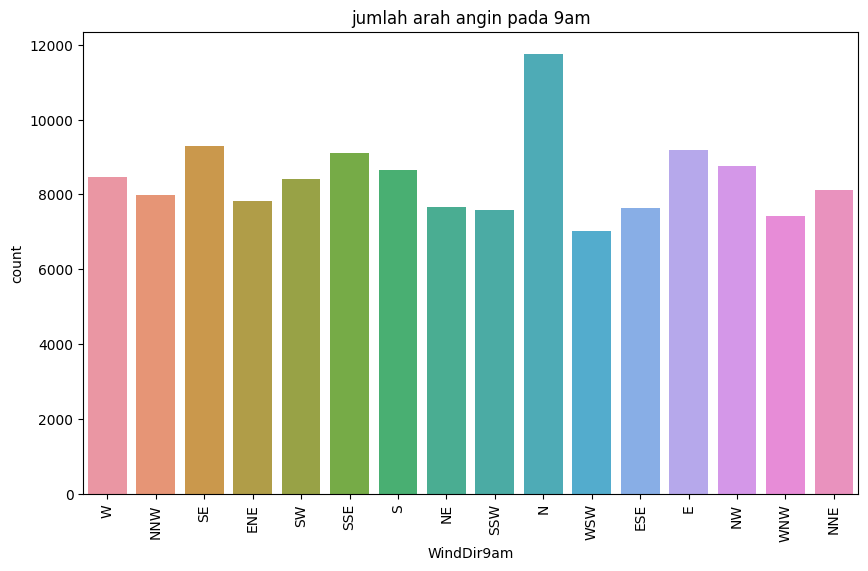

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='WindDir9am')
plt.title('jumlah arah angin pada 9am')
plt.xticks(rotation=90)
plt.show()

- N: Utara
- SE: Tenggara
- E: Timur
- SSE: Selatan-Tenggara
- NW: Barat Laut
- S: Selatan
- W: Barat
- SW: Barat Daya
- NNE: Utara-Timur Laut
- NNW: Utara-Barat Laut
- ENE: Timur-Laut
- NE: Timur Laut
- ESE: Timur-Tenggara
- SSW: Selatan-Barat Daya
- WNW: Barat Laut-Barat Laut
- WSW: Barat-Barat Daya

jumlah frekuensi kemunculan masing-masing arah angin dapat memberikan gambaran tentang dominasi atau kecenderungan arah angin dalam dataset yang dianalisis. Dalam contoh ini, angka-angka tersebut mengindikasikan bahwa arah angin yang paling umum adalah Utara (N), diikuti oleh Tenggara (SE), Timur (E), dan seterusnya.

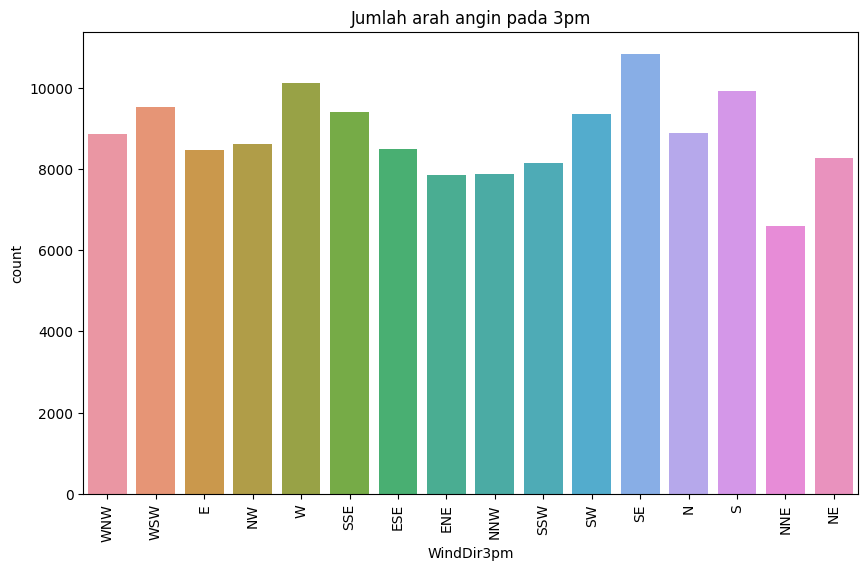

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='WindDir3pm')
plt.title('Jumlah arah angin pada 3pm')
plt.xticks(rotation=90)
plt.show()

Seperti yang dapat dilihat dari data frekuensi, arah angin yang paling umum adalah Tenggara (SE), diikuti oleh Barat (W) dan Selatan (S).

### Bar plot

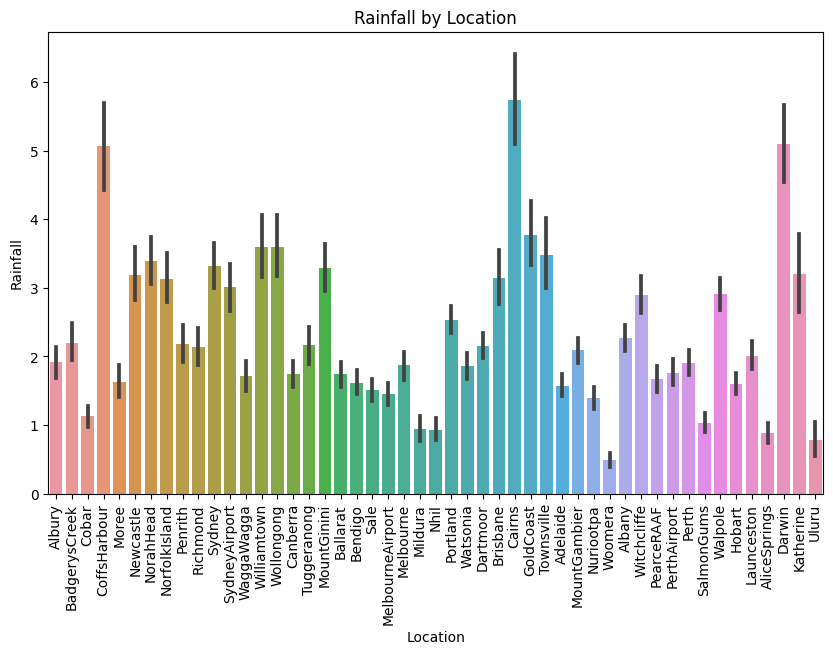

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Location', y='Rainfall')
plt.title('Rainfall by Location')
plt.xticks(rotation=90)
plt.show()

Angka-angka ini mencerminkan frekuensi kemunculan curah hujan pada setiap tingkat yang tercantum. Data ini menunjukkan bahwa curah hujan dengan intensitas 0.0 (tanpa hujan)

##Checking Correlation

In [ ]:
label = LabelEncoder()
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='O').columns:
    df_encoded[col]=label.fit_transform(df_encoded[col])

Label encoder digunakan untuk mengganti value dari kolom categorical menjadi numerical agar dapat melihat korelasi di seluruh data

In [ ]:
correlation = df_encoded.corr()
correlation

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,1.000000,0.019887,0.021058,0.044122,-0.012234,0.082058,0.011873,-0.027787,-0.024008,-0.014610,...,0.000045,-0.011186,0.033577,0.027200,0.065445,0.042758,0.031361,0.031906,0.005478,0.005672
Location,0.019887,1.000000,-0.006783,-0.020828,-0.002761,0.043898,0.004276,-0.020357,0.071708,-0.022376,...,-0.000039,0.012951,0.036692,0.046720,-0.011575,-0.019724,-0.016031,-0.023471,0.010276,0.010202
MinTemp,0.021058,-0.006783,1.000000,0.736555,0.103938,0.466993,0.072586,-0.125465,0.177415,-0.125108,...,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906,0.053249,0.077324
MaxTemp,0.044122,-0.020828,0.736555,1.000000,-0.074992,0.587932,0.470156,-0.206774,0.067615,-0.247524,...,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503,-0.202647,-0.141733
Rainfall,-0.012234,-0.002761,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.044790,0.133659,0.065656,...,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657,0.501516,0.223487
Evaporation,0.082058,0.043898,0.466993,0.587932,-0.064351,1.000000,0.365602,-0.091455,0.203021,-0.124414,...,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893,-0.173909,-0.105260
Sunshine,0.011873,0.004276,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.087145,-0.034750,-0.113812,...,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501,-0.301930,-0.405503
WindGustDir,-0.027787,-0.020357,-0.125465,-0.206774,0.044790,-0.091455,-0.087145,1.000000,0.142169,0.361995,...,0.073148,0.074583,-0.119386,-0.028872,0.078101,0.069413,-0.168893,-0.220273,0.125907,0.081421
WindGustSpeed,-0.024008,0.071708,0.177415,0.067615,0.133659,0.203021,-0.034750,0.142169,1.000000,-0.051322,...,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748,0.145569,0.216463
WindDir9am,-0.014610,-0.022376,-0.125108,-0.247524,0.065656,-0.124414,-0.113812,0.361995,-0.051322,1.000000,...,0.202862,0.164415,0.029780,0.109646,0.112269,0.066921,-0.202709,-0.250056,0.142918,0.035575


### Correlation heatmap

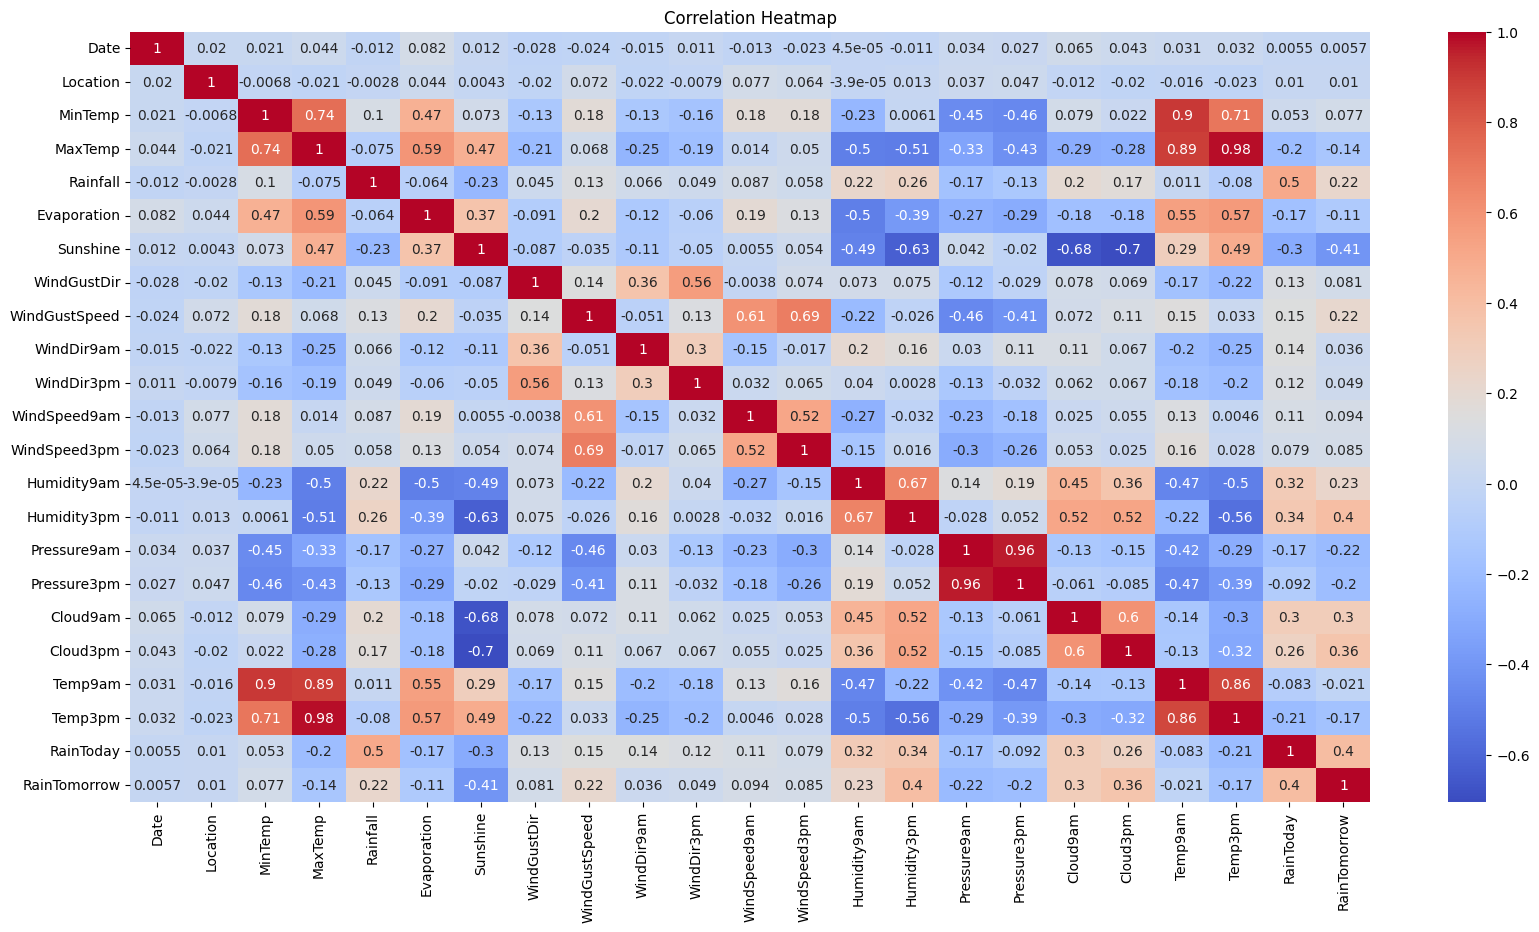

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
correlation['RainTomorrow'].sort_values(ascending=False)

RainTomorrow     1.000000
RainToday        0.404622
Humidity3pm      0.397160
Cloud3pm         0.356059
Cloud9am         0.301263
Humidity9am      0.230747
Rainfall         0.223487
WindGustSpeed    0.216463
WindSpeed9am     0.093878
WindSpeed3pm     0.084738
WindGustDir      0.081421
MinTemp          0.077324
WindDir3pm       0.049499
WindDir9am       0.035575
Location         0.010202
Date             0.005672
Temp9am         -0.020539
Evaporation     -0.105260
MaxTemp         -0.141733
Temp3pm         -0.169035
Pressure3pm     -0.197110
Pressure9am     -0.215554
Sunshine        -0.405503
Name: RainTomorrow, dtype: float64

Column yang akan dipilih adalah column yang memiliki korelasi lebih dari 2%

##Checking na value

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Sunshine         69835
Evaporation      62790
Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
Rainfall          3261
RainToday         3261
WindSpeed3pm      3062
Humidity9am       2654
Temp9am           1767
WindSpeed9am      1767
MinTemp           1485
MaxTemp           1261
Location             0
Date                 0
dtype: int64

karea column 'Cloud3pm' dan 'Cloud9am' memiliki teralu banyak na value, maka column yang akan dipilih adalah (RainTomorrow, RainToday, Humidity3pm, Humidity9am, Rainfall, WindGustSpeed)

In [ ]:
data_=pd.DataFrame(df.isnull().sum(),columns=['Number Of Null'])
data_['Percentage']=data_['Number Of Null']/df.shape[0]*100
data_

,Number Of Null,Percentage
Date,0,0.000000
Location,0,0.000000
MinTemp,1485,1.020899
MaxTemp,1261,0.866905
Rainfall,3261,2.241853
Evaporation,62790,43.166506
Sunshine,69835,48.009762
WindGustDir,10326,7.098859
WindGustSpeed,10263,7.055548
WindDir9am,10566,7.263853


##Missing Data Mechanisms



Membuat column baru untuk menentukan Missing data machanisms

In [ ]:
df['RainToday_null'] = np.where(df.RainToday.isnull(), 1, 0)
df['Humidity3pm_null'] = np.where(df.Humidity3pm .isnull(), 1, 0)
df['Humidity9am_null'] = np.where(df.Humidity9am.isnull(), 1, 0)
df['Rainfall_null'] = np.where(df.Rainfall.isnull(), 1, 0)
df['WindGustSpeed_null'] = np.where(df.WindGustSpeed.isnull(), 1, 0)
df['RainTomorrow_null'] = np.where(df.WindGustSpeed.isnull(), 1, 0)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp9am,Temp3pm,RainToday,RainTomorrow,RainToday_null,Humidity3pm_null,Humidity9am_null,Rainfall_null,WindGustSpeed_null,RainTomorrow_null
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,16.9,21.8,No,No,0,0,0,0,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,17.2,24.3,No,No,0,0,0,0,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,21.0,23.2,No,No,0,0,0,0,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,18.1,26.5,No,No,0,0,0,0,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,17.8,29.7,No,No,0,0,0,0,0,0


###RainTomorrow_null

In [ ]:
print('Value Counts')
print(df.groupby(['Humidity9am'])['RainTomorrow_null'].value_counts())

print('\nMean')
print(df.groupby(['Humidity9am'])['RainTomorrow_null'].mean())

Value Counts
Humidity9am  RainTomorrow_null
0.0          0                       1
1.0          0                       5
2.0          0                       8
3.0          0                       9
             1                       1
                                  ... 
98.0         1                      82
99.0         0                    3292
             1                      99
100.0        0                    2773
             1                      90
Name: RainTomorrow_null, Length: 192, dtype: int64

Mean
Humidity9am
0.0      0.000000
1.0      0.000000
2.0      0.000000
3.0      0.100000
4.0      0.000000
           ...   
96.0     0.077688
97.0     0.070989
98.0     0.039066
99.0     0.029195
100.0    0.031436
Name: RainTomorrow_null, Length: 101, dtype: float64


In [ ]:
print('Value Counts')
print(df.groupby(['Humidity3pm'])['RainTomorrow_null'].value_counts())

print('\nMean')
print(df.groupby(['Humidity3pm'])['RainTomorrow_null'].mean())

Value Counts
Humidity3pm  RainTomorrow_null
0.0          0                      4
1.0          0                     26
2.0          0                     34
             1                      1
3.0          0                     63
                                 ... 
98.0         1                     29
99.0         0                    415
             1                     19
100.0        0                    380
             1                     20
Name: RainTomorrow_null, Length: 199, dtype: int64

Mean
Humidity3pm
0.0      0.000000
1.0      0.000000
2.0      0.028571
3.0      0.000000
4.0      0.017699
           ...   
96.0     0.073593
97.0     0.049628
98.0     0.048093
99.0     0.043779
100.0    0.050000
Name: RainTomorrow_null, Length: 101, dtype: float64


In [ ]:
print('Value Counts')
print(df.groupby(['RainToday'])['RainTomorrow_null'].value_counts())

print('\nMean')
print(df.groupby(['RainToday'])['RainTomorrow_null'].mean())

Value Counts
RainToday  RainTomorrow_null
No         0                    103161
           1                      7158
Yes        0                     29373
           1                      2507
Name: RainTomorrow_null, dtype: int64

Mean
RainToday
No     0.064885
Yes    0.078639
Name: RainTomorrow_null, dtype: float64


In [ ]:
print('Value Counts')
print(df.groupby(['Rainfall'])['RainTomorrow_null'].value_counts())

print('\nMean')
print(df.groupby(['Rainfall'])['RainTomorrow_null'].mean())

Value Counts
Rainfall  RainTomorrow_null
0.0       0                    85228
          1                     5852
0.1       0                      106
          1                       51
0.2       0                     8279
                               ...  
247.2     0                        1
268.6     0                        1
278.4     0                        1
367.6     0                        1
371.0     1                        1
Name: RainTomorrow_null, Length: 955, dtype: int64

Mean
Rainfall
0.0      0.064251
0.1      0.324841
0.2      0.055017
0.3      0.123077
0.4      0.065838
           ...   
247.2    0.000000
268.6    0.000000
278.4    0.000000
367.6    0.000000
371.0    1.000000
Name: RainTomorrow_null, Length: 681, dtype: float64


###RainToday_null

In [ ]:
print('Value Counts')
print(df.groupby(['Humidity9am'])['RainToday_null'].value_counts())

print('\nMean')
print(df.groupby(['Humidity9am'])['RainToday_null'].mean())

Value Counts
Humidity9am  RainToday_null
0.0          0                    1
1.0          0                    5
2.0          0                    8
3.0          0                   10
4.0          0                   20
                               ... 
98.0         1                   23
99.0         0                 3354
             1                   37
100.0        0                 2846
             1                   17
Name: RainToday_null, Length: 186, dtype: int64

Mean
Humidity9am
0.0      0.000000
1.0      0.000000
2.0      0.000000
3.0      0.000000
4.0      0.000000
           ...   
96.0     0.019888
97.0     0.016210
98.0     0.010958
99.0     0.010911
100.0    0.005938
Name: RainToday_null, Length: 101, dtype: float64


In [ ]:
print('Value Counts')
print(df.groupby(['Humidity3pm'])['RainToday_null'].value_counts())

print('\nMean')
print(df.groupby(['Humidity3pm'])['RainToday_null'].mean())

Value Counts
Humidity3pm  RainToday_null
0.0          0                   4
1.0          0                  26
2.0          0                  35
3.0          0                  63
4.0          0                 113
                              ... 
98.0         1                  12
99.0         0                 426
             1                   8
100.0        0                 392
             1                   8
Name: RainToday_null, Length: 196, dtype: int64

Mean
Humidity3pm
0.0      0.000000
1.0      0.000000
2.0      0.000000
3.0      0.000000
4.0      0.000000
           ...   
96.0     0.017316
97.0     0.022333
98.0     0.019900
99.0     0.018433
100.0    0.020000
Name: RainToday_null, Length: 101, dtype: float64


In [ ]:
print('Value Counts')
print(df.groupby(['Rainfall'])['RainToday_null'].value_counts())

print('\nMean')
print(df.groupby(['Rainfall'])['RainToday_null'].mean())

Value Counts
Rainfall  RainToday_null
0.0       0                 91080
0.1       0                   157
0.2       0                  8761
0.3       0                    65
0.4       0                  3782
                            ...  
247.2     0                     1
268.6     0                     1
278.4     0                     1
367.6     0                     1
371.0     0                     1
Name: RainToday_null, Length: 681, dtype: int64

Mean
Rainfall
0.0      0.0
0.1      0.0
0.2      0.0
0.3      0.0
0.4      0.0
        ... 
247.2    0.0
268.6    0.0
278.4    0.0
367.6    0.0
371.0    0.0
Name: RainToday_null, Length: 681, dtype: float64


In [ ]:
print('Value Counts')
print(df.groupby(['RainToday'])['RainToday_null'].value_counts())

print('\nMean')
print(df.groupby(['RainToday'])['RainToday_null'].mean())

Value Counts
RainToday  RainToday_null
No         0                 110319
Yes        0                  31880
Name: RainToday_null, dtype: int64

Mean
RainToday
No     0.0
Yes    0.0
Name: RainToday_null, dtype: float64


In [ ]:
print('Value Counts')
print(df.groupby(['RainTomorrow'])['RainToday_null'].value_counts())

print('\nMean')
print(df.groupby(['RainTomorrow'])['RainToday_null'].mean())

Value Counts
RainTomorrow  RainToday_null
No            0                 109586
              1                    730
Yes           0                  31201
              1                    676
Name: RainToday_null, dtype: int64

Mean
RainTomorrow
No     0.006617
Yes    0.021207
Name: RainToday_null, dtype: float64


###Humidity3pm_null

In [ ]:
print('Value Counts')
print(df.groupby(['Humidity9am'])['Humidity3pm_null'].value_counts())

print('\nMean')
print(df.groupby(['Humidity9am'])['Humidity3pm_null'].mean())

Value Counts
Humidity9am  Humidity3pm_null
0.0          0                      1
1.0          0                      5
2.0          0                      8
3.0          0                      9
             1                      1
                                 ... 
98.0         1                     44
99.0         0                   3353
             1                     38
100.0        0                   2826
             1                     37
Name: Humidity3pm_null, Length: 193, dtype: int64

Mean
Humidity9am
0.0      0.000000
1.0      0.000000
2.0      0.000000
3.0      0.100000
4.0      0.050000
           ...   
96.0     0.027346
97.0     0.017887
98.0     0.020962
99.0     0.011206
100.0    0.012924
Name: Humidity3pm_null, Length: 101, dtype: float64


In [ ]:
print('Value Counts')
print(df.groupby(['Rainfall'])['Humidity3pm_null'].value_counts())

print('\nMean')
print(df.groupby(['Rainfall'])['Humidity3pm_null'].mean())

Value Counts
Rainfall  Humidity3pm_null
0.0       0                   88874
          1                    2206
0.1       0                     148
          1                       9
0.2       0                    8569
                              ...  
247.2     0                       1
268.6     0                       1
278.4     0                       1
367.6     0                       1
371.0     0                       1
Name: Humidity3pm_null, Length: 888, dtype: int64

Mean
Rainfall
0.0      0.024220
0.1      0.057325
0.2      0.021915
0.3      0.046154
0.4      0.023268
           ...   
247.2    0.000000
268.6    0.000000
278.4    0.000000
367.6    0.000000
371.0    0.000000
Name: Humidity3pm_null, Length: 681, dtype: float64


In [ ]:
print('Value Counts')
print(df.groupby(['RainToday'])['Humidity3pm_null'].value_counts())

print('\nMean')
print(df.groupby(['RainToday'])['Humidity3pm_null'].mean())

Value Counts
RainToday  Humidity3pm_null
No         0                   107636
           1                     2683
Yes        0                    30933
           1                      947
Name: Humidity3pm_null, dtype: int64

Mean
RainToday
No     0.024320
Yes    0.029705
Name: Humidity3pm_null, dtype: float64


In [ ]:
print('Value Counts')
print(df.groupby(['WindGustSpeed'])['Humidity3pm_null'].value_counts())

print('\nMean')
print(df.groupby(['WindGustSpeed'])['Humidity3pm_null'].mean())

Value Counts
WindGustSpeed  Humidity3pm_null
6.0            0                     1
7.0            0                    19
9.0            0                    91
11.0           0                   190
               1                     2
                                  ... 
124.0          0                     2
126.0          0                     2
130.0          0                     1
135.0          0                     2
               1                     1
Name: Humidity3pm_null, Length: 118, dtype: int64

Mean
WindGustSpeed
6.0      0.000000
7.0      0.000000
9.0      0.000000
11.0     0.010417
13.0     0.015038
           ...   
122.0    0.333333
124.0    0.000000
126.0    0.000000
130.0    0.000000
135.0    0.333333
Name: Humidity3pm_null, Length: 67, dtype: float64


In [ ]:
print('Value Counts')
print(df.groupby(['RainTomorrow'])['Humidity3pm_null'].value_counts())

print('\nMean')
print(df.groupby(['RainTomorrow'])['Humidity3pm_null'].mean())

Value Counts
RainTomorrow  Humidity3pm_null
No            0                   107670
              1                     2646
Yes           0                    30913
              1                      964
Name: Humidity3pm_null, dtype: int64

Mean
RainTomorrow
No     0.023986
Yes    0.030241
Name: Humidity3pm_null, dtype: float64


###Humidity9am_null

In [ ]:
print('Value Counts')
print(df.groupby(['Humidity3pm'])['Humidity9am_null'].value_counts())

print('\nMean')
print(df.groupby(['Humidity3pm'])['Humidity9am_null'].mean())

Value Counts
Humidity3pm  Humidity9am_null
0.0          0                     4
1.0          0                    23
             1                     3
2.0          0                    35
3.0          0                    63
                                ... 
98.0         1                    21
99.0         0                   421
             1                    13
100.0        0                   381
             1                    19
Name: Humidity9am_null, Length: 194, dtype: int64

Mean
Humidity3pm
0.0      0.000000
1.0      0.115385
2.0      0.000000
3.0      0.000000
4.0      0.000000
           ...   
96.0     0.010823
97.0     0.024814
98.0     0.034826
99.0     0.029954
100.0    0.047500
Name: Humidity9am_null, Length: 101, dtype: float64


In [ ]:
print('Value Counts')
print(df.groupby(['Rainfall'])['Humidity9am_null'].value_counts())

print('\nMean')
print(df.groupby(['Rainfall'])['Humidity9am_null'].mean())

Value Counts
Rainfall  Humidity9am_null
0.0       0                   90273
          1                     807
0.1       0                     155
          1                       2
0.2       0                    8618
                              ...  
247.2     0                       1
268.6     0                       1
278.4     0                       1
367.6     0                       1
371.0     0                       1
Name: Humidity9am_null, Length: 832, dtype: int64

Mean
Rainfall
0.0      0.008860
0.1      0.012739
0.2      0.016322
0.3      0.000000
0.4      0.013485
           ...   
247.2    0.000000
268.6    0.000000
278.4    0.000000
367.6    0.000000
371.0    0.000000
Name: Humidity9am_null, Length: 681, dtype: float64


In [ ]:
print('Value Counts')
print(df.groupby(['RainToday'])['Humidity9am_null'].value_counts())

print('\nMean')
print(df.groupby(['RainToday'])['Humidity9am_null'].mean())

Value Counts
RainToday  Humidity9am_null
No         0                   109224
           1                     1095
Yes        0                    31421
           1                      459
Name: Humidity9am_null, dtype: int64

Mean
RainToday
No     0.009926
Yes    0.014398
Name: Humidity9am_null, dtype: float64


In [ ]:
print('Value Counts')
print(df.groupby(['WindGustSpeed'])['Humidity9am_null'].value_counts())

print('\nMean')
print(df.groupby(['WindGustSpeed'])['Humidity9am_null'].mean())

Value Counts
WindGustSpeed  Humidity9am_null
6.0            0                     1
7.0            0                    19
9.0            0                    91
11.0           0                   189
               1                     3
                                  ... 
122.0          1                     1
124.0          0                     2
126.0          0                     2
130.0          0                     1
135.0          0                     3
Name: Humidity9am_null, Length: 116, dtype: int64

Mean
WindGustSpeed
6.0      0.000000
7.0      0.000000
9.0      0.000000
11.0     0.015625
13.0     0.020677
           ...   
122.0    0.333333
124.0    0.000000
126.0    0.000000
130.0    0.000000
135.0    0.000000
Name: Humidity9am_null, Length: 67, dtype: float64


In [ ]:
print('Value Counts')
print(df.groupby(['RainTomorrow'])['Humidity9am_null'].value_counts())

print('\nMean')
print(df.groupby(['RainTomorrow'])['Humidity9am_null'].mean())

Value Counts
RainTomorrow  Humidity9am_null
No            0                   109076
              1                     1240
Yes           0                    31343
              1                      534
Name: Humidity9am_null, dtype: int64

Mean
RainTomorrow
No     0.011240
Yes    0.016752
Name: Humidity9am_null, dtype: float64


###Rainfall_null

In [ ]:
print('Value Counts')
print(df.groupby(['Humidity3pm'])['Rainfall_null'].value_counts())

print('\nMean')
print(df.groupby(['Humidity3pm'])['Rainfall_null'].mean())

Value Counts
Humidity3pm  Rainfall_null
0.0          0                  4
1.0          0                 26
2.0          0                 35
3.0          0                 63
4.0          0                113
                             ... 
98.0         1                 12
99.0         0                426
             1                  8
100.0        0                392
             1                  8
Name: Rainfall_null, Length: 196, dtype: int64

Mean
Humidity3pm
0.0      0.000000
1.0      0.000000
2.0      0.000000
3.0      0.000000
4.0      0.000000
           ...   
96.0     0.017316
97.0     0.022333
98.0     0.019900
99.0     0.018433
100.0    0.020000
Name: Rainfall_null, Length: 101, dtype: float64


In [ ]:
print('Value Counts')
print(df.groupby(['RainTomorrow'])['Rainfall_null'].value_counts())

print('\nMean')
print(df.groupby(['RainTomorrow'])['Rainfall_null'].mean())

Value Counts
RainTomorrow  Rainfall_null
No            0                109586
              1                   730
Yes           0                 31201
              1                   676
Name: Rainfall_null, dtype: int64

Mean
RainTomorrow
No     0.006617
Yes    0.021207
Name: Rainfall_null, dtype: float64


In [ ]:
print('Value Counts')
print(df.groupby(['Humidity9am'])['Rainfall_null'].value_counts())

print('\nMean')
print(df.groupby(['Humidity9am'])['Rainfall_null'].mean())

Value Counts
Humidity9am  Rainfall_null
0.0          0                   1
1.0          0                   5
2.0          0                   8
3.0          0                  10
4.0          0                  20
                              ... 
98.0         1                  23
99.0         0                3354
             1                  37
100.0        0                2846
             1                  17
Name: Rainfall_null, Length: 186, dtype: int64

Mean
Humidity9am
0.0      0.000000
1.0      0.000000
2.0      0.000000
3.0      0.000000
4.0      0.000000
           ...   
96.0     0.019888
97.0     0.016210
98.0     0.010958
99.0     0.010911
100.0    0.005938
Name: Rainfall_null, Length: 101, dtype: float64


In [ ]:
print('Value Counts')
print(df.groupby(['RainToday'])['Rainfall_null'].value_counts())

print('\nMean')
print(df.groupby(['RainToday'])['Rainfall_null'].mean())

Value Counts
RainToday  Rainfall_null
No         0                110319
Yes        0                 31880
Name: Rainfall_null, dtype: int64

Mean
RainToday
No     0.0
Yes    0.0
Name: Rainfall_null, dtype: float64


In [ ]:
print('Value Counts')
print(df.groupby(['WindGustSpeed'])['Rainfall_null'].value_counts())

print('\nMean')
print(df.groupby(['WindGustSpeed'])['Rainfall_null'].mean())

Value Counts
WindGustSpeed  Rainfall_null
6.0            0                  1
7.0            0                 19
9.0            0                 91
11.0           0                191
               1                  1
                               ... 
124.0          0                  2
126.0          0                  2
130.0          0                  1
135.0          0                  2
               1                  1
Name: Rainfall_null, Length: 119, dtype: int64

Mean
WindGustSpeed
6.0      0.000000
7.0      0.000000
9.0      0.000000
11.0     0.005208
13.0     0.005639
           ...   
122.0    0.333333
124.0    0.000000
126.0    0.000000
130.0    0.000000
135.0    0.333333
Name: Rainfall_null, Length: 67, dtype: float64


###WindGustSpeed_null

In [ ]:
print('Value Counts')
print(df.groupby(['Humidity3pm'])['WindGustSpeed_null'].value_counts())

print('\nMean')
print(df.groupby(['Humidity3pm'])['WindGustSpeed_null'].mean())

Value Counts
Humidity3pm  WindGustSpeed_null
0.0          0                       4
1.0          0                      26
2.0          0                      34
             1                       1
3.0          0                      63
                                  ... 
98.0         1                      29
99.0         0                     415
             1                      19
100.0        0                     380
             1                      20
Name: WindGustSpeed_null, Length: 199, dtype: int64

Mean
Humidity3pm
0.0      0.000000
1.0      0.000000
2.0      0.028571
3.0      0.000000
4.0      0.017699
           ...   
96.0     0.073593
97.0     0.049628
98.0     0.048093
99.0     0.043779
100.0    0.050000
Name: WindGustSpeed_null, Length: 101, dtype: float64


In [ ]:
print('Value Counts')
print(df.groupby(['Humidity9am'])['WindGustSpeed_null'].value_counts())

print('\nMean')
print(df.groupby(['Humidity9am'])['WindGustSpeed_null'].mean())

Value Counts
Humidity9am  WindGustSpeed_null
0.0          0                        1
1.0          0                        5
2.0          0                        8
3.0          0                        9
             1                        1
                                   ... 
98.0         1                       82
99.0         0                     3292
             1                       99
100.0        0                     2773
             1                       90
Name: WindGustSpeed_null, Length: 192, dtype: int64

Mean
Humidity9am
0.0      0.000000
1.0      0.000000
2.0      0.000000
3.0      0.100000
4.0      0.000000
           ...   
96.0     0.077688
97.0     0.070989
98.0     0.039066
99.0     0.029195
100.0    0.031436
Name: WindGustSpeed_null, Length: 101, dtype: float64


In [ ]:
print('Value Counts')
print(df.groupby(['RainToday'])['WindGustSpeed_null'].value_counts())

print('\nMean')
print(df.groupby(['RainToday'])['WindGustSpeed_null'].mean())

Value Counts
RainToday  WindGustSpeed_null
No         0                     103161
           1                       7158
Yes        0                      29373
           1                       2507
Name: WindGustSpeed_null, dtype: int64

Mean
RainToday
No     0.064885
Yes    0.078639
Name: WindGustSpeed_null, dtype: float64


In [ ]:
print('Value Counts')
print(df.groupby(['RainTomorrow'])['WindGustSpeed_null'].value_counts())

print('\nMean')
print(df.groupby(['RainTomorrow'])['WindGustSpeed_null'].mean())

Value Counts
RainTomorrow  WindGustSpeed_null
No            0                     103488
              1                       6828
Yes           0                      29435
              1                       2442
Name: WindGustSpeed_null, dtype: int64

Mean
RainTomorrow
No     0.061895
Yes    0.076607
Name: WindGustSpeed_null, dtype: float64


In [ ]:
print('Value Counts')
print(df.groupby(['Rainfall'])['WindGustSpeed_null'].value_counts())

print('\nMean')
print(df.groupby(['Rainfall'])['WindGustSpeed_null'].mean())

Value Counts
Rainfall  WindGustSpeed_null
0.0       0                     85228
          1                      5852
0.1       0                       106
          1                        51
0.2       0                      8279
                                ...  
247.2     0                         1
268.6     0                         1
278.4     0                         1
367.6     0                         1
371.0     1                         1
Name: WindGustSpeed_null, Length: 955, dtype: int64

Mean
Rainfall
0.0      0.064251
0.1      0.324841
0.2      0.055017
0.3      0.123077
0.4      0.065838
           ...   
247.2    0.000000
268.6    0.000000
278.4    0.000000
367.6    0.000000
371.0    1.000000
Name: WindGustSpeed_null, Length: 681, dtype: float64


Setelah melakukan analisa lebih dalam terhadap na value, maka dapat disimpulkan bahwa dataset ini ada pada kategori Missing Completely At Random (MCAR)

#Data cleaning

In [ ]:
dfx = df[['RainToday','Humidity3pm','Humidity9am','Rainfall','WindGustSpeed','RainTomorrow']]

In [ ]:
dfx.head()

,RainToday,Humidity3pm,Humidity9am,Rainfall,WindGustSpeed,RainTomorrow
0,No,22.0,71.0,0.6,44.0,No
1,No,25.0,44.0,0.0,44.0,No
2,No,30.0,38.0,0.0,46.0,No
3,No,16.0,45.0,0.0,24.0,No
4,No,33.0,82.0,1.0,41.0,No


Feature selection dilakukan sebelum train test split dikarenakan ingin mengganti na value pada numerical column menjadi mean, lalu drop na value pada categorical column termasuk column yang akan dijadikan target

In [ ]:
dfx['Humidity3pm'].fillna(dfx['Humidity3pm'].mean(), inplace = True)
dfx['Humidity9am'].fillna(dfx['Humidity9am'].mean(), inplace = True)
dfx['Rainfall'].fillna(dfx['Rainfall'].mean(), inplace = True)
dfx['WindGustSpeed'].fillna(dfx['WindGustSpeed'].mean(), inplace = True)

<ipython-input-70-e476b5b6e6cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['Humidity3pm'].fillna(dfx['Humidity3pm'].mean(), inplace = True)
<ipython-input-70-e476b5b6e6cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['Humidity9am'].fillna(dfx['Humidity9am'].mean(), inplace = True)
<ipython-input-70-e476b5b6e6cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['Rainfall'].fillna(dfx['Rainfall'].mean(), inplace = T

In [ ]:
dfx = dfx.dropna()

In [ ]:
dfx.isnull().sum()

RainToday        0
Humidity3pm      0
Humidity9am      0
Rainfall         0
WindGustSpeed    0
RainTomorrow     0
dtype: int64

In [ ]:
X = dfx.drop(columns=['RainTomorrow'],axis=1)
y = dfx['RainTomorrow']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
X_train.shape, X_test.shape

((98550, 5), (42237, 5))

##Outlier Handling

###Identify variable distribution

In [ ]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

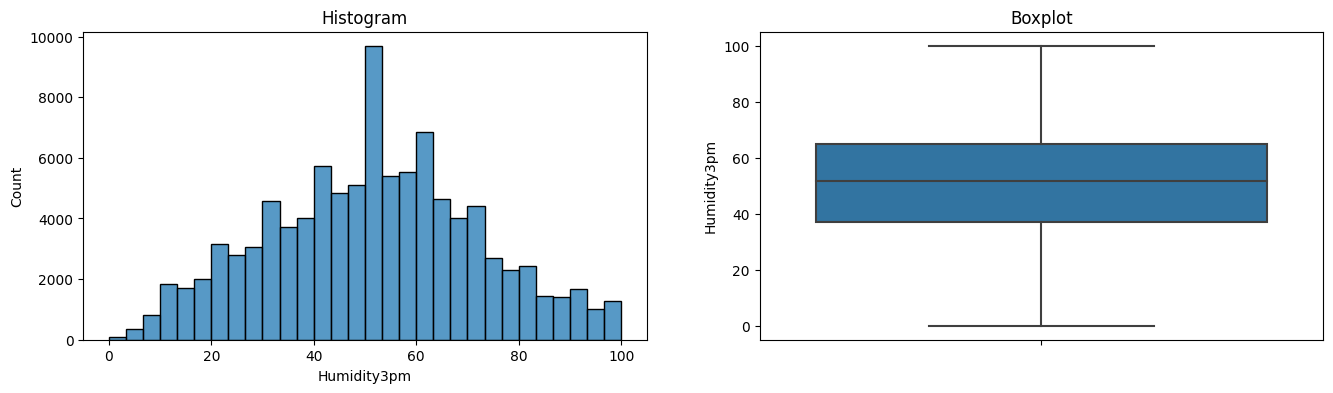

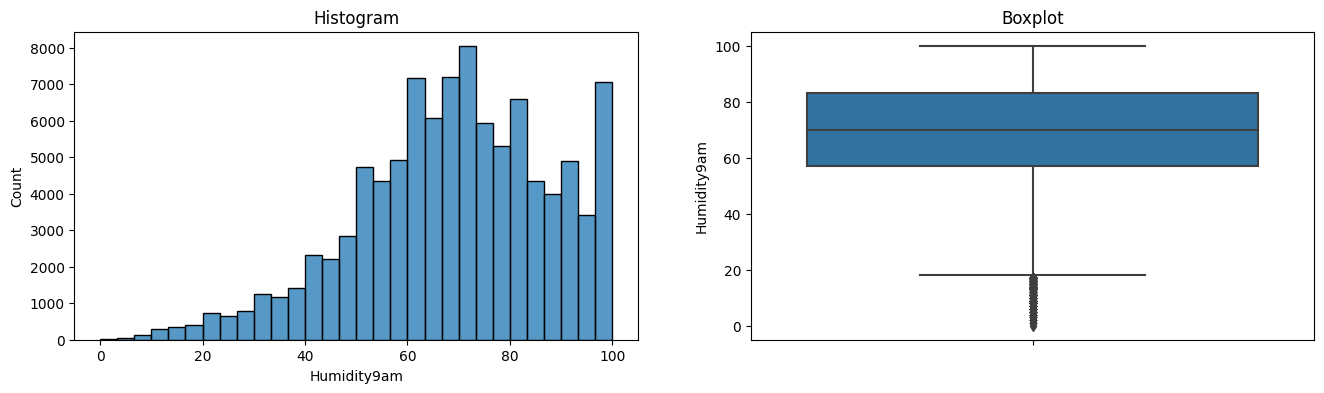

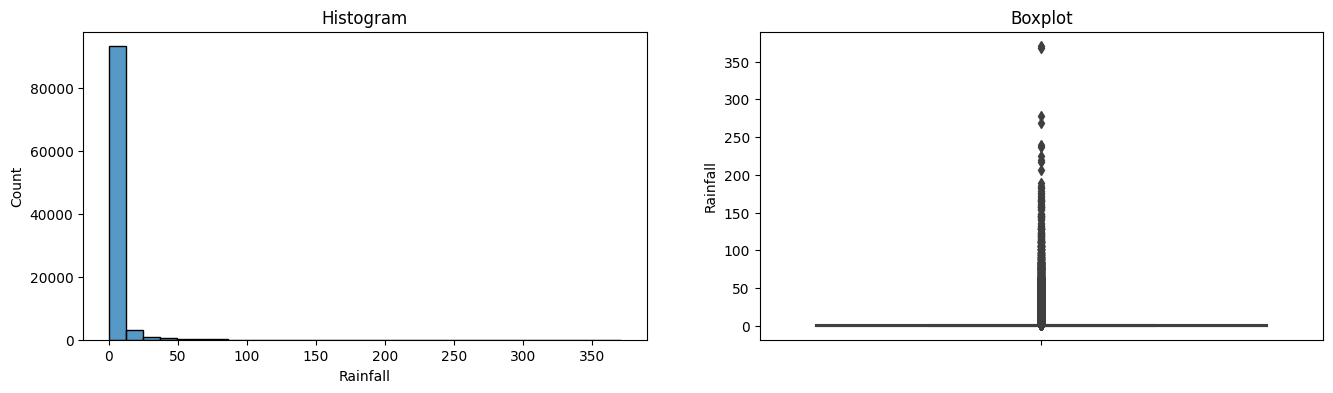

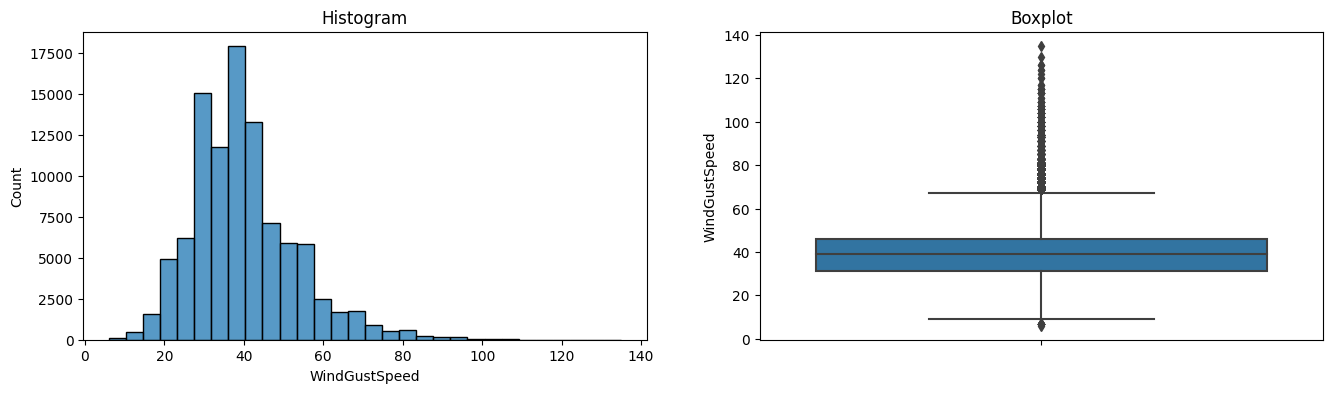

In [ ]:
diagnostic_plots(X_train, 'Humidity3pm')
diagnostic_plots(X_train, 'Humidity9am')
diagnostic_plots(X_train, 'Rainfall')
diagnostic_plots(X_train, 'WindGustSpeed')

In [ ]:
print('Humidity3pm Skewness Value   : ', X_train['Humidity3pm'].skew())
print('Humidity9am Skewness Value   : ', X_train['Humidity9am'].skew())
print('Rainfall Skewness Value      : ', X_train['Rainfall'].skew())
print('WindGustSpeed Skewness Value : ', X_train['WindGustSpeed'].skew())

Humidity3pm Skewness Value   :  0.038371176900346034
Humidity9am Skewness Value   :  -0.48485352003011634
Rainfall Skewness Value      :  10.310663111195053
WindGustSpeed Skewness Value :  0.9100292573691066


'Humidity3pm' tidak memiliki outlier, bisa dilihat dari boxplot untuk Humidity3pm, tidak memiliki titik-titik, untuk memastikan nya akan diidentifikasi lagi

###Outlier detection for Normally distributed variables

In [ ]:
def find_normal_boundaries(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [ ]:
upper_boundary, lower_boundary = find_normal_boundaries(X_train, 'Humidity3pm')
upper_boundary, lower_boundary

(113.21658233390067, -10.264055928005767)

In [ ]:
print('Total Humidity3pm: {}'.format(len(X_train)))
print('Humidity3pm with more than 113 (right end outliers) : {}'.format(len(X_train[X_train['Humidity3pm'] > upper_boundary])))
print('Humidity3pm with less than -10 (left end outliers.  : {}'.format(len(X_train[X_train['Humidity3pm'] < lower_boundary])))
print('')
print('% right end outliers : {}'.format(len(X_train[X_train['Humidity3pm'] > upper_boundary]) / len(X_train) * 100))
print('% left end outliers  : {}'.format(len(X_train[X_train['Humidity3pm'] < lower_boundary]) / len(X_train) * 100))

Total Humidity3pm: 98550
Humidity3pm with more than 113 (right end outliers) : 0
Humidity3pm with less than -10 (left end outliers.  : 0

% right end outliers : 0.0
% left end outliers  : 0.0


Humidity3pm tidak memiliki Outliers

###Outlier detection for skewed variables

In [ ]:
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [ ]:
am_upper_limit, am_lower_limit = find_skewed_boundaries(X_train, 'Humidity9am', 1.5)
am_upper_limit, am_lower_limit

RF_upper_limit, RF_lower_limit = find_skewed_boundaries(X_train, 'Rainfall', 1.5)
RF_upper_limit, RF_lower_limit

WGS_upper_limit, WGS_lower_limit = find_skewed_boundaries(X_train, 'WindGustSpeed', 1.5)
WGS_upper_limit, WGS_lower_limit

print('Humidity9am upper limit : ', am_upper_limit)
print('Humidity9am lower limit : ', am_lower_limit, '\n')
print('Rainfall upper limit : ', RF_upper_limit)
print('Rainfall lower limitt : ', RF_lower_limit, '\n')
print('WindGustSpeed upper limit : ', WGS_upper_limit)
print('WindGustSpeed lower limit : ', WGS_lower_limit)

Humidity9am upper limit :  122.0
Humidity9am lower limit :  18.0 

Rainfall upper limit :  1.5
Rainfall lower limitt :  -0.8999999999999999 

WindGustSpeed upper limit :  68.5
WindGustSpeed lower limit :  8.5


In [ ]:
print('Total Humidity9am : {}'.format(len(X_train)))
print('Humidity9am less than 18   : {}'.format(len(X_train[X_train['Humidity9am'] < am_lower_limit])))
print('')
print('% Humidity9am less than 18 : {}'.format(len(X_train[X_train['Humidity9am'] < am_lower_limit])/len(X_train) * 100))

Total Humidity9am : 98550
Humidity9am less than 18   : 988

% Humidity9am less than 18 : 1.0025367833587011


Humidity9am memiliki 1% Outlier

In [ ]:
print('Total Rainfall : {}'.format(len(X_train)))
print('Rainfall more than 1.5   : {}'.format(len(X_train[X_train['Rainfall'] > RF_upper_limit])))
print('')
print('% Rainfall more than 1.5 : {}'.format(len(X_train[X_train['Rainfall'] > RF_upper_limit])/len(X_train) * 100))

Total Rainfall : 98550
Rainfall more than 1.5   : 19965

% Rainfall more than 1.5 : 20.25875190258752


Rainfall memilki 20% Outlier, karena jumlah outlier cukup besar maka Rainfall tidak perlu di Capping

In [ ]:
print('Total WindGustSpeed : {}'.format(len(X_train)))
print('WindGustSpeed more than 68.5   : {}'.format(len(X_train[X_train['WindGustSpeed'] > WGS_upper_limit])))
print('')
print('% WindGustSpeed more than 68.5  : {}'.format(len(X_train[X_train['WindGustSpeed'] > WGS_upper_limit])/len(X_train) * 100))

Total WindGustSpeed : 98550
WindGustSpeed more than 68.5   : 3717

% WindGustSpeed more than 68.5  : 3.771689497716895


WindGustSpeed memiliki 3% persen Outlier

###Capping method

capping atau winorizing data. Ini adalah metode di mana Anda menetapkan nilai maksimum fitur ke nilai tertentu. Anda dapat memutuskan untuk menetapkan 1% terbawah ke nilai persentil kedua, dan 1% teratas ke nilai persentil ke-99.

In [ ]:
cols = ['Humidity9am','WindGustSpeed']

In [ ]:
def capping_out(df, cols, from_low_bond, from_high_bond):

  for col in cols:
    stats.mstats.winsorize(a=df[col], limits=(from_low_bond, from_high_bond), inplace =True)

In [ ]:
print("before capping")
X_train[['Humidity9am','WindGustSpeed']].describe()

before capping


,Humidity9am,WindGustSpeed
count,98550.000000,98550.000000
mean,68.866158,39.943364
std,18.973102,13.132320
min,0.000000,6.000000
25%,57.000000,31.000000
50%,70.000000,39.000000
75%,83.000000,46.000000
max,100.000000,135.000000


In [ ]:
capping_out(X_train, cols, 0.1, 0.1)
capping_out(X_test, cols, 0.1, 0.1)

In [ ]:
print("after capping")
X_train[['Humidity9am','WindGustSpeed']].describe()

after capping


,Humidity9am,WindGustSpeed
count,98550.000000,98550.000000
mean,69.701978,39.299305
std,15.978419,10.194216
min,44.000000,24.000000
25%,57.000000,31.000000
50%,70.000000,39.000000
75%,83.000000,46.000000
max,94.000000,57.000000


##One-Hot-Encoding

In [ ]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

##Feature scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Modeling

Fungsi ini digunakan untuk mengevaluasi hasil training dan test model, serta confusion matrix dari training dan test

In [ ]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("HASIL TRAINING : \n=================================================================================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("=================================================================================")

    print("TESTING RESULTS: \n=================================================================================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("=================================================================================")

##Logistic Regression

1. Alasan memilih Logistic Regression adalah karena kita memiliki masalah klasifikasi biner (prediksi apakah besok akan hujan atau tidak). Logistic Regression merupakan salah satu model klasifikasi yang sederhana dan mudah diinterpretasikan.
2. Cocok untuk data yang telah diolah dengan fitur-fitur yang relevan dan setelah dilakukan normalisasi fitur menggunakan StandardScaler.

In [ ]:
modelLogistic = LogisticRegression()
model = modelLogistic.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
evaluate(model, X_train, X_test, y_train, y_test)

HASIL TRAINING : 
CONFUSION MATRIX:
[[72865  3927]
 [12220  9538]]
ACCURACY SCORE:
0.8362
CLASSIFICATION REPORT:
                     No           Yes  accuracy     macro avg  weighted avg
precision      0.856379      0.708355  0.836154      0.782367      0.823698
recall         0.948862      0.438367  0.836154      0.693615      0.836154
f1-score       0.900251      0.541578  0.836154      0.720915      0.821063
support    76792.000000  21758.000000  0.836154  98550.000000  98550.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[31153  1641]
 [ 5336  4107]]
ACCURACY SCORE:
0.8348
CLASSIFICATION REPORT:
                     No          Yes  accuracy     macro avg  weighted avg
precision      0.853764     0.714509  0.834813      0.784137      0.822631
recall         0.949960     0.434925  0.834813      0.692443      0.834813
f1-score       0.899297     0.540715  0.834813      0.720006      0.819128
support    32794.000000  9443.000000  0.834813  42237.000000  42237.000000


##SVC

1. Alasan memilih SVC adalah karena SVC dapat bekerja dengan baik pada dataset dengan fitur yang beragam dan memiliki kemampuan untuk menangani data yang tidak linier.
2. Model ini juga cocok untuk data yang telah diolah dengan fitur-fitur yang relevan dan setelah dilakukan normalisasi fitur menggunakan StandardScaler.

In [ ]:
modelSVC = SVC()
model1 = modelSVC.fit(X_train,y_train)
y_pred=model1.predict(X_test)

In [ ]:
evaluate(model1, X_train, X_test, y_train, y_test)

HASIL TRAINING : 
CONFUSION MATRIX:
[[74060  2732]
 [13127  8631]]
ACCURACY SCORE:
0.8391
CLASSIFICATION REPORT:
                     No           Yes  accuracy     macro avg  weighted avg
precision      0.849439      0.759571  0.839077      0.804505      0.829597
recall         0.964423      0.396682  0.839077      0.680553      0.839077
f1-score       0.903286      0.521180  0.839077      0.712233      0.818924
support    76792.000000  21758.000000  0.839077  98550.000000  98550.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[31626  1168]
 [ 5721  3722]]
ACCURACY SCORE:
0.8369
CLASSIFICATION REPORT:
                     No          Yes  accuracy     macro avg  weighted avg
precision      0.846815     0.761145  0.836897      0.803980      0.827662
recall         0.964384     0.394154  0.836897      0.679269      0.836897
f1-score       0.901784     0.519361  0.836897      0.710572      0.816285
support    32794.000000  9443.000000  0.836897  42237.000000  42237.000000


##Model evaluation

In [ ]:
modelLogisticTrain = accuracy_score(y_train, modelLogistic.predict(X_train))
modelLogisticTest = accuracy_score(y_test, modelLogistic.predict(X_test))
modelSVCTrain = accuracy_score(y_train, modelSVC.predict(X_train))
modelSVCTest = accuracy_score(y_test, modelSVC.predict(X_test))

In [ ]:
model_selection=pd.DataFrame({'Train_acc':[modelLogisticTrain, modelSVCTrain],
                              'Test_acc': [modelLogisticTest,modelSVCTest]},
                              index=['LogisticRegression','SVC'])

In [ ]:
model_selection

,Train_acc,Test_acc
LogisticRegression,0.836154,0.834813
SVC,0.839077,0.836897


- Train_acc (Akurasi train): Menunjukkan seberapa akurat model saat melakukan prediksi pada dataset train. Dalam konteks ini, model LogisticRegression memiliki akurasi train sebesar 0.836154, sedangkan model SVC memiliki akurasi train sebesar 0.839077. Semakin tinggi nilai akurasi pelatihan, semakin baik model dapat mempelajari pola dan informasi dari dataset train.

- Test_acc (Akurasi test): Menunjukkan seberapa akurat model saat melakukan prediksi pada dataset test yang sebelumnya tidak terlihat oleh model saat proses test. Dalam konteks ini, model LogisticRegression memiliki akurasi pengujian sebesar 0.834813, sedangkan model SVC memiliki akurasi test sebesar 0.836897. Semakin tinggi nilai akurasi test, semakin baik model dapat melakukan generalisasi pada data baru yang tidak terlihat sebelumnya.

<Axes: >

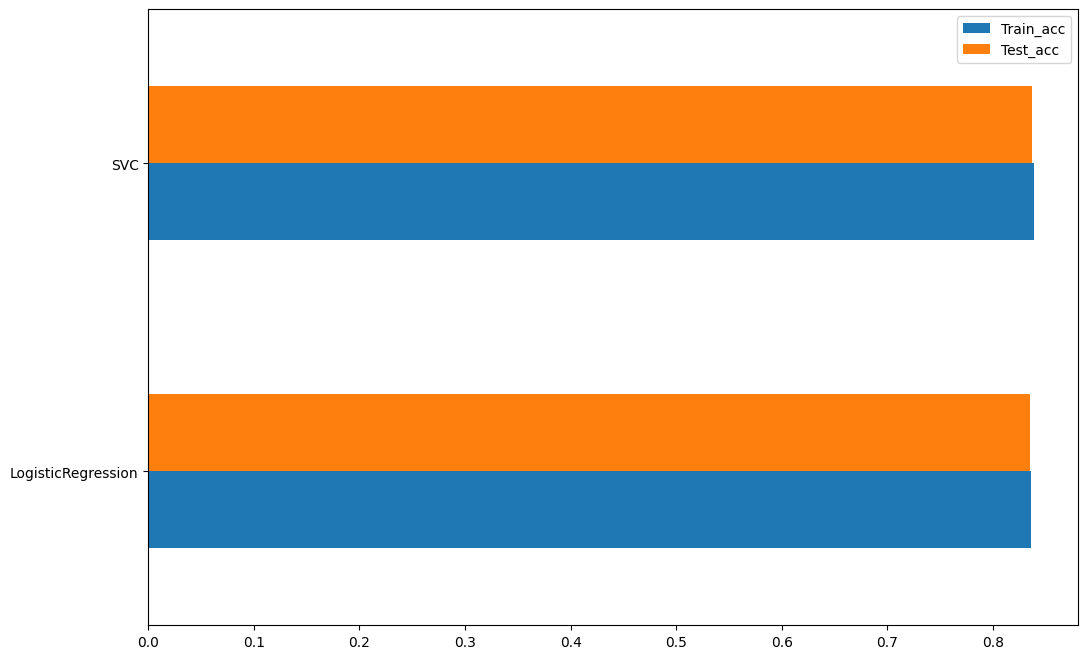

In [ ]:
scores = (model_selection)

scores.plot(kind='barh', figsize=(12, 8))

kedua model memiliki akurasi yang tidak jauh berbeda, tetapi SVC membutuhkan waktu training yang lebih lama dibandingkan Logistic Regression

#Save Model

In [ ]:
pickle.dump(scaler, open("scaler.pickle", "wb"))
ssc = pickle.load(open("scaler.pickle", 'rb'))

pickle.dump(modelLogistic, open('logistic.pkl','wb'))
pickle.dump(modelSVC, open('SVC.pkl','wb'))
modelLogistic = pickle.load(open('logistic.pkl','rb'))
modelSVC = pickle.load(open('SVC.pkl','rb'))